In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import time
import tensorflow as tf
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [41]:
df = pd.read_json("C:\Coursova\carswanted.json")

In [3]:
df.head()

,brandmodel,cartype,color,vehiclenumber,bodynumber,chassisnumber,enginenumber,illegalseizuredate,organunit,insertdate
0,Shantui SD16 - 1,Вантажний автотранспорт,НЕВИЗНАЧЕНИЙ,34226ВН,,CHSD16AATL1047235,1220A000365,2022-03-24T00:00:00,ШЕВЧЕНКІВСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ПРИМОРСЬКОГО ...,2022-04-28T00:00:00
1,Bobcat S650 - 1,Вантажний автотранспорт,НЕВИЗНАЧЕНИЙ,34271ВН,,1J951000008LC2331,A3NW14664,2022-03-24T00:00:00,ШЕВЧЕНКІВСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ПРИМОРСЬКОГО ...,2022-04-28T00:00:00
2,DACIA - LOGAN,Легковий автотранспорт,СІРИЙ,ВВ3466ЕХ,UU1LSD4GH39367660,,K7JA710UE48481,2022-04-28T00:00:00,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЛУГА...,2022-04-28T00:00:00
3,АВТОСПЕЦПРОМ - САШМД,Легковий автотранспорт,БІЛИЙ,АР9462ЕС,Y79941118H9C64130,,10TRJA0984824,2022-03-03T00:00:00,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЗАПО...,2022-04-29T00:00:00
4,FORD - TRANSIT,Легковий автотранспорт,СИНІЙ,ВВ5903СК,WF0XXXTTFX7Y85272,WF0XXXTTFX7Y85272,7Y85272,2022-04-30T00:00:00,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЛУГА...,2022-04-30T00:00:00


In [4]:
df.describe()

,brandmodel,cartype,color,vehiclenumber,bodynumber,chassisnumber,enginenumber,illegalseizuredate,organunit,insertdate
count,83411,83411,83411,83411,83411,83411,83411,83411,83411,83411
unique,20189,9,231,72086,59752,29963,54247,9276,804,8769
top,HONDA,Легковий автотранспорт,БІЛИЙ,,,,,2014-04-28T00:00:00,ДАРНИЦЬКЕ УПРАВЛІННЯ ПОЛІЦІЇ ГУНП В М. КИЄВІ,2011-01-28T00:00:00
freq,1102,49170,13979,11004,23141,52864,28503,835,2046,505


In [5]:
path = "C:\\Coursova\\archive\\training_data\\"
folders_numbers = '0123456789'
folders_letters = 'ABCDEFGHIJKLMNOPQRTUVWXYZ'
alphabet = folders_numbers + folders_letters

x = []
y = []

In [6]:
for i in range(len(os.listdir(f'{path}\\numbers\\'))):
    idx = i
    for j in range(len(os.listdir(f'{path}\\numbers\\{i}'))):
        image = cv2.imread(f'{path}\\numbers\\{i}\\{idx}.png')
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(grey, (24, 44))
        toBinary = np.where(resized > 128, 255, 0)
        x.append([toBinary])
        y.append(i)
        idx += 10

In [7]:
for i in range(len(os.listdir(f'{path}\\letters\\'))):
    for j in range(len(os.listdir(f'{path}\\letters\\{folders_letters[i]}\\'))):
        image = cv2.imread(f'{path}\\letters\\{folders_letters[i]}\\{j}.png')
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(grey, (24, 44))
        toBinary = np.where(resized > 128, 0, 255)
        x.append([toBinary])
        y.append(10+i)

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [11]:
model = Sequential()
model.add(Conv2D(64, (8,8), input_shape=(1, 44, 24), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(1, 44, 24), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

C:\python\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
788/788 [==============================] - 45s 56ms/step - loss: 1.6379 - accuracy: 0.5615
Epoch 2/10
788/788 [==============================] - 44s 56ms/step - loss: 1.0336 - accuracy: 0.7229
Epoch 3/10
788/788 [==============================] - 41s 52ms/step - loss: 0.9128 - accuracy: 0.7494
Epoch 4/10
788/788 [==============================] - 41s 52ms/step - loss: 0.8548 - accuracy: 0.7626
Epoch 5/10
788/788 [==============================] - 41s 52ms/step - loss: 0.8093 - accuracy: 0.7753
Epoch 6/10
788/788 [==============================] - 43s 54ms/step - loss: 0.7663 - accuracy: 0.7828
Epoch 7/10
788/788 [==============================] - 41s 52ms/step - loss: 0.7366 - accuracy: 0.7918
Epoch 8/10
788/788 [==============================] - 40s 51ms/step - loss: 0.7169 - accuracy: 0.7937
Epoch 9/10
788/788 [==============================] - 46s 58ms/step - loss: 0.6871 - accuracy: 0.8035
Epoch 10/10
788/788 [==============================] - 43s 55ms/step - loss: 0.670

In [14]:
y_predicted = model.predict(X_test).argmax(axis=1)

197/197 [==============================] - 4s 19ms/step


In [15]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       106
           1       1.00      0.93      0.96       113
           2       0.98      0.96      0.97       112
           3       0.97      0.97      0.97        98
           4       0.96      1.00      0.98       115
           5       0.99      1.00      1.00       120
           6       0.96      1.00      0.98       122
           7       0.99      0.96      0.98       111
           8       0.98      0.98      0.98       111
           9       0.99      0.98      0.99       121
          10       0.76      0.75      0.76       220
          11       0.84      0.62      0.71       264
          12       0.83      0.85      0.84       228
          13       0.73      0.80      0.77       194
          14       0.78      0.83      0.81       192
          15       0.87      0.82      0.84       228
          16       0.73      0.86      0.79       199
          17       0.75    

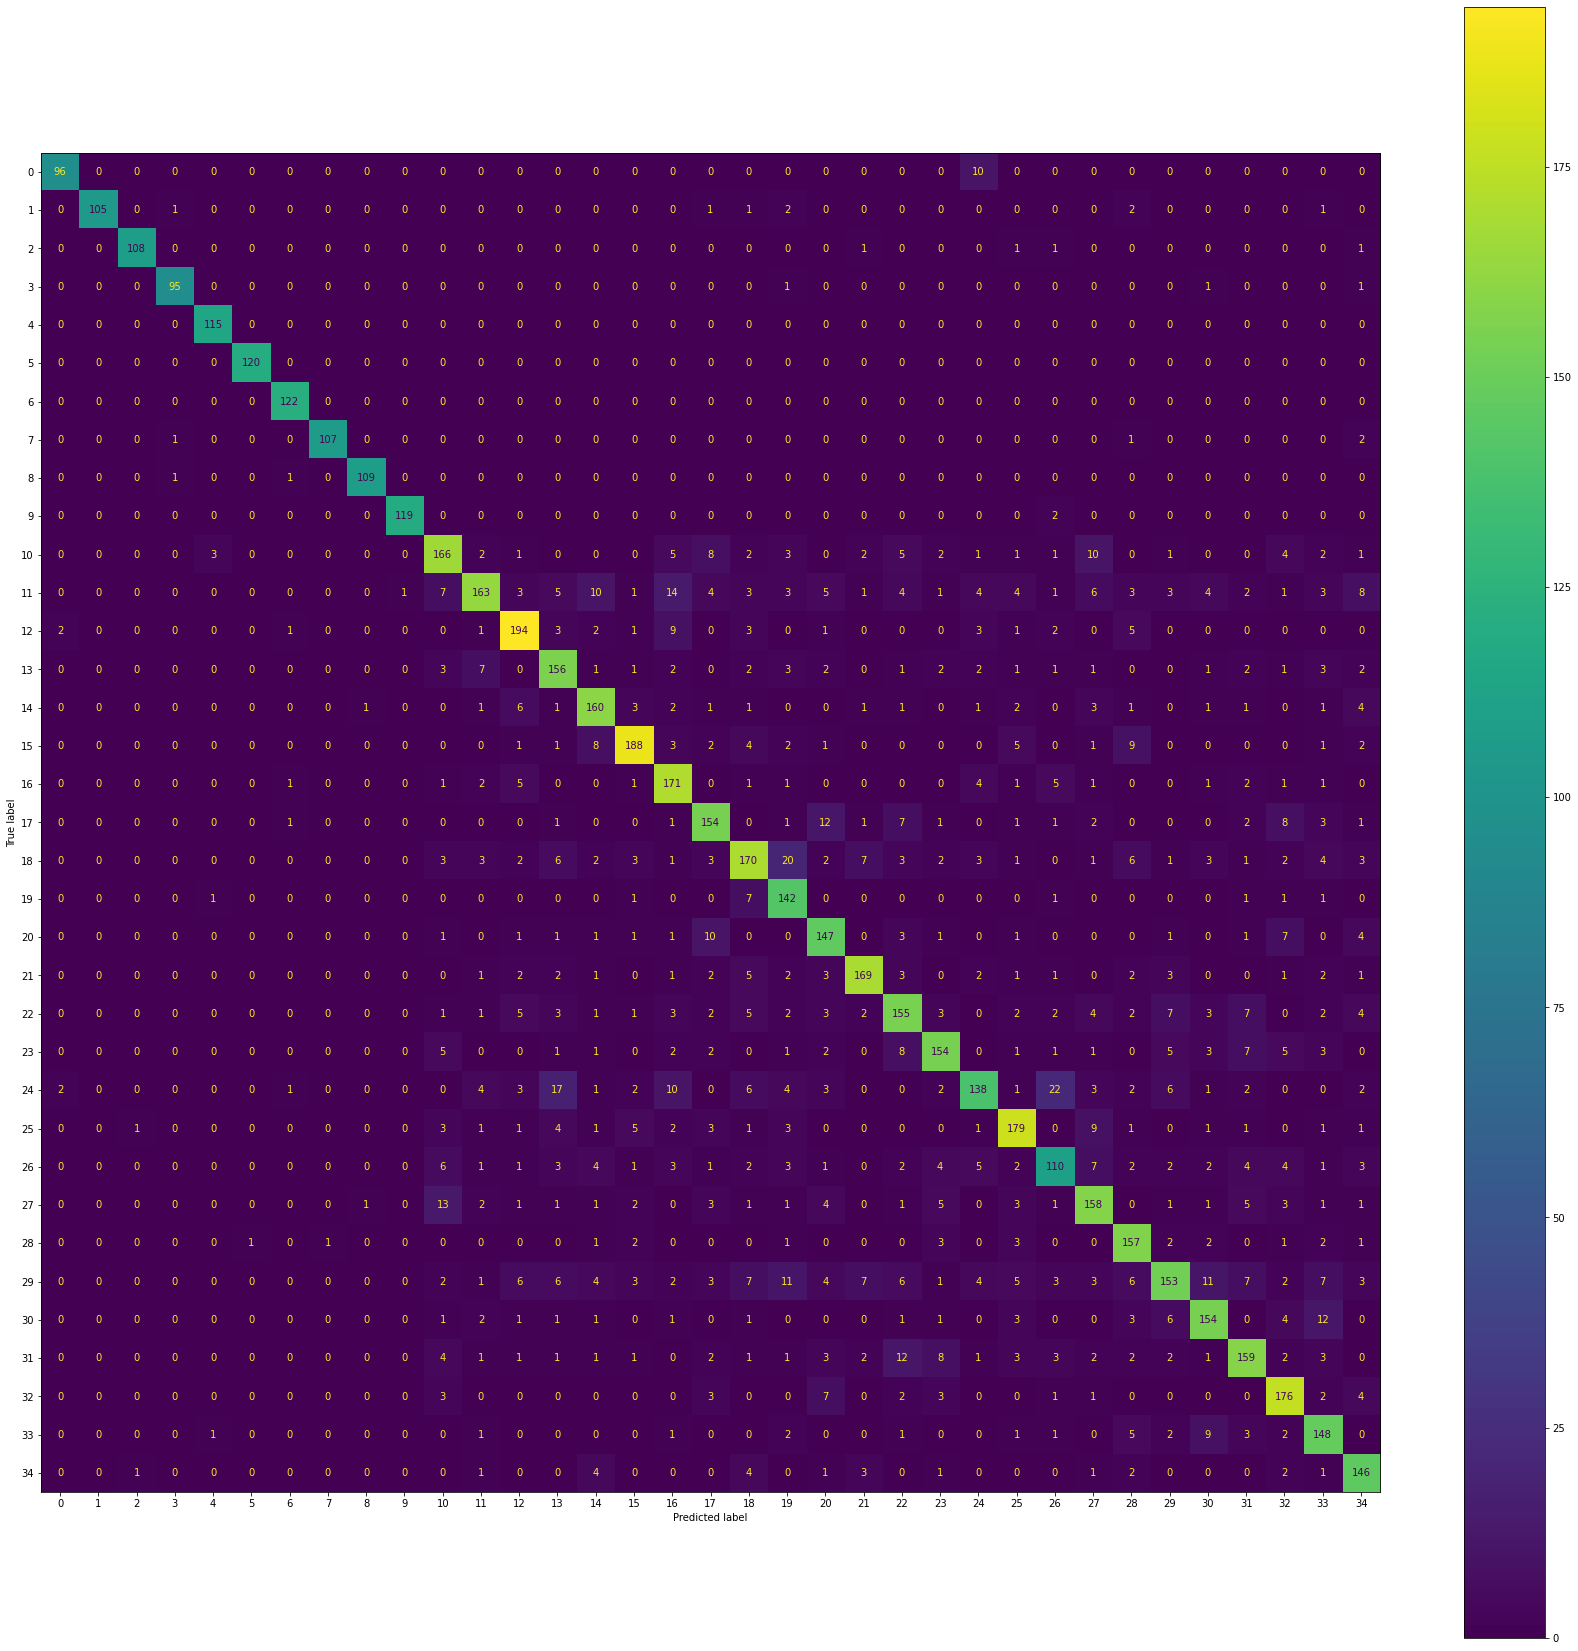

In [16]:
conf = confusion_matrix(y_predicted, y_test)
cmp = ConfusionMatrixDisplay(conf)
fig, ax = plt.subplots(figsize=(30,30))
cmp.plot(ax=ax)

In [17]:
plateCascade = cv2.CascadeClassifier("C:\Coursova\haarcascade_plate_number.xml")

In [18]:
def detect_plate(image):
    plateImg = image.copy()
    roi = image.copy()
    plateRect = plateCascade.detectMultiScale(plateImg,scaleFactor=1.2, minNeighbors = 7) #, minSize=(25,25))
    for (x, y, w, h) in plateRect:
        roi_ = roi[y:y+h, x:x+w, :]
        platePart = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plateImg, (x,y),(x+w, y+h), (0, 255, 0), 3)
    return plateImg, platePart

In [19]:
def show(img):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_)
    plt.show()

In [20]:
def find_contours(dimensions, img):
    #finding dimensions of all countours
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    c1 = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs:
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height:
            x_cntr_list.append(intX)
            char_copy = np.zeros((44, 24))
            
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            cv2.rectangle(c1, (intX, intY), (intWidth+intX, intY+intHeight), (50, 21, 200), 2)
            plt.imshow(c1, cmap='gray')
            char = cv2.subtract(255, char)
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            img_res.append(char_copy)
        
    plt.show()
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)
    
    return img_res

In [21]:
def segment_characters(image):
    img_lp = cv2.resize(image, (600, 250))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 150, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))
    
    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]
    img_binary_lp[0:3, :] = 255
    img_binary_lp[:, 0:3] = 255
    img_binary_lp[245:250, :] = 255
    img_binary_lp[:, 590:600] = 255
    
    dimensions = [LP_WIDTH/10, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3, LP_HEIGHT/10, 2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg', img_binary_lp)
    
    char_list = find_contours(dimensions, img_binary_lp)
    
    return img_binary_lp, char_list

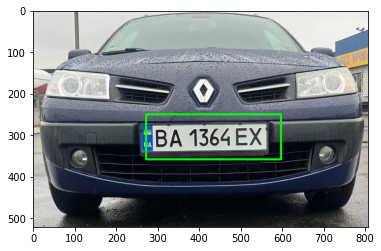

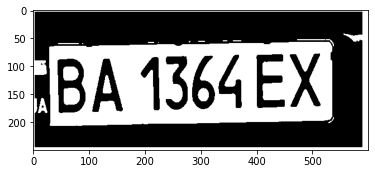

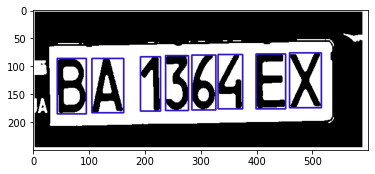

1/1 [==============================] - 0s 62ms/step


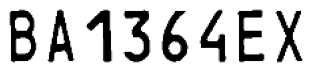

In [67]:
inputImg = cv2.imread("C:\\Coursova\\cars_ua\\car17.jpg")   # 14, 17, 36(en), 63, 49, 55 (curve)
inpImg, plate = detect_plate(inputImg)
show(inpImg)
pic, val = segment_characters(plate)

for i in range(len(val)):
    plt.subplot(1, len(val)+1, i+1)
    plt.imshow(255-val[i], cmap='gray')
    plt.axis('off')

l = []
for item in val:
    idx = np.argmax(model.predict(np.array([[255-item]])))
    l.append(alphabet[idx])

In [68]:
number = ''.join(i for i in l)
print(number)

BA1364EX


In [69]:
answer = input(f"Чи правильно модель розпізнала номер {number}?\nВідповідь (y/n): ")
if answer == 'y':
    NumberPlate = number
    print("Розпізнано успішно!")
else:
    answer = input("Чи розпізнано номер частково?\nВідповідь (y/n): ")
    if answer == 'y':
        indexes = input("Через кому введіть позиції коректно розпізнаних елементів\nВідповідь: ")
        indexes = list(indexes.split(","))
        list_indexes = [int(i) for i in indexes]
        NumberPlate = ''.join(number[i-1] for i in list_indexes)
        print(NumberPlate)
        answer = input(f"Чи правильна комбінація елементів номеру {NumberPlate}?\nВідповідь (y/n): ")
        if answer == 'y':
            print("Номер введено!")
        else:
            NumberPlate = input("Введіть номер вручну латинськими літерами: ").upper()
    else:
        NumberPlate = input("Якщо можливо розпізнати, введіть номерний знак вручну\nВідповідь: ")

Чи правильно модель розпізнала номер BA1364EX?
Відповідь (y/n): y
Розпізнано успішно!


In [70]:
TestData = {"brandmodel":"Renault-Megane", 
            "cartype":"Легковий автотранспорт",
            "color":"Металік",
            "vehiclenumber":"BA1364EX",
            "bodynumber":"AODA263009201",
            "chassisnumber":"",
            "enginenumber":"843A10001765324",
            "illegalseizuredate":"2022-02-24T00:00:00",
            "organunit":"ЦЕНТРАЛЬНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ДОНЕЦЬКІЙ ОБЛ.",
            "insertdate":"2022-08-11T00:00:00"}

In [71]:
df = df.append(TestData, ignore_index=True)

In [72]:
IsEmpty = df.loc[df['vehiclenumber'] == NumberPlate].empty
if IsEmpty:
    print("Дані про викрадення автомобіля відсутні!")
else:
    display(df.loc[df['vehiclenumber'] == NumberPlate])

,brandmodel,cartype,color,vehiclenumber,bodynumber,chassisnumber,enginenumber,illegalseizuredate,organunit,insertdate
83411,Renault-Megane,Легковий автотранспорт,Металік,BA1364EX,AODA263009201,,843A10001765324,2022-02-24T00:00:00,ЦЕНТРАЛЬНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,2022-08-11T00:00:00
